In [38]:
import json
import math
import os.path
import sqlite3

import numpy as np
import torch
from matplotlib import pyplot as plt
from matplotlib import cm


In [39]:
#TABLE prior_sensitivity_experiment(prior_val, std_blur, std_noise, img_index)

In [98]:
version = 2
params_path = f'results/prior_sensitivity_experiment/custom_material_prior/version_{version}/params.json'

In [99]:
with open(params_path, 'r') as fp:
        params_dict = json.load(fp)
value_db_path = os.path.join(params_dict['result_dir'], 'values.db')

In [100]:
connection = sqlite3.connect(value_db_path)
cursor = connection.cursor()

In [101]:
#view for variance data
cursor.execute("DROP VIEW IF EXISTS average_value_data")
cursor.execute("CREATE view IF NOT EXISTS average_value_data as SELECT AVG(prior_val), std_blur, std_noise from prior_sensitivity_experiment group by std_blur, std_noise order by std_blur, std_noise")
connection.commit()

In [102]:
#noise_std_start = params_dict['noise_std_start']
#noise_std_end = params_dict['noise_std_end']
#noise_std_steps = params_dict['noise_std_steps']
#std_start = params_dict['std_start']
#std_end = params_dict['std_end']
#std_steps = params_dict['std_steps']
#x = np.linspace(noise_std_start, noise_std_end, noise_std_steps)
#y = np.linspace(std_start, std_end, std_steps)
#X, Y = np.meshgrid(x, y)

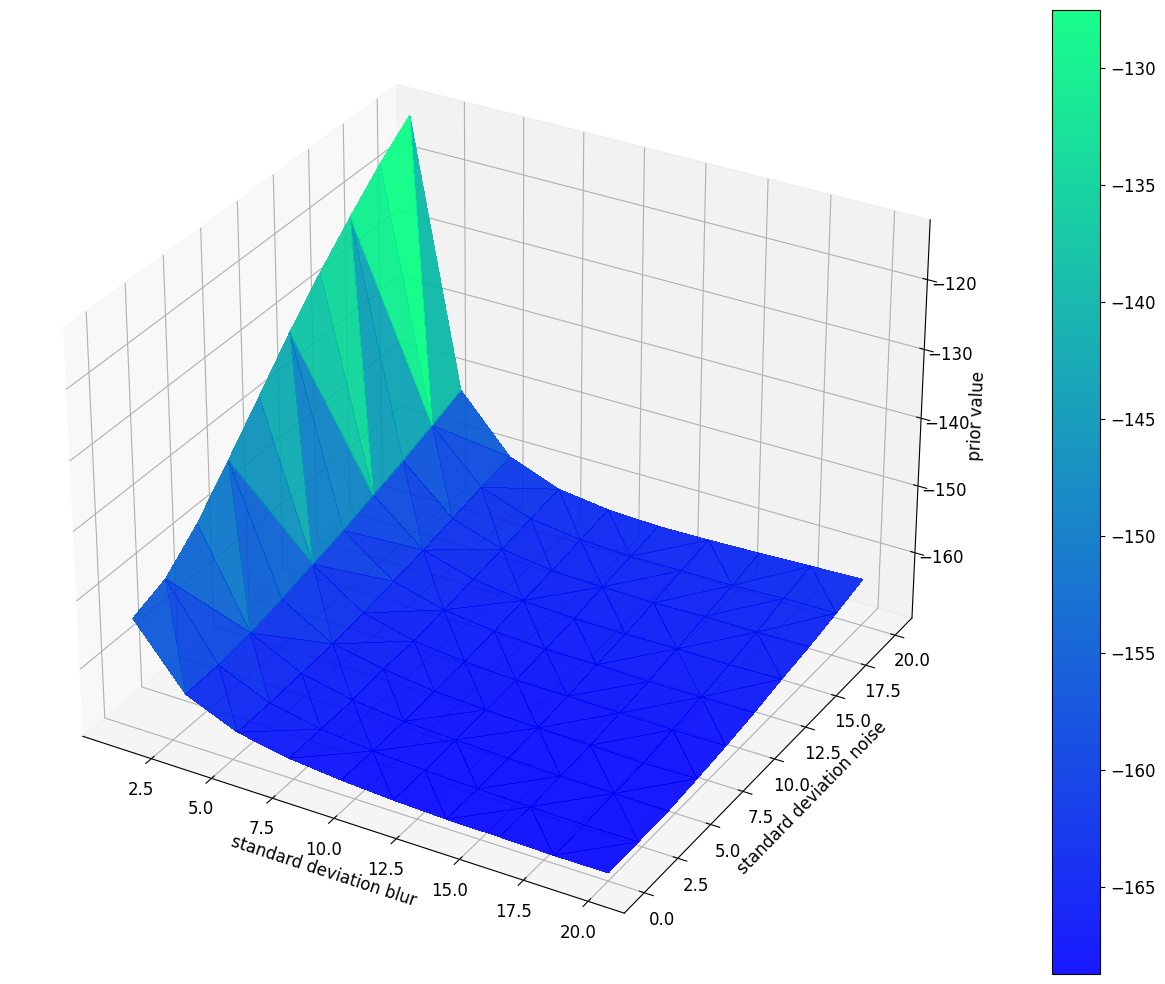

In [133]:
cursor.execute("SELECT * from average_value_data")
means, std_blur, std_noise = zip(*cursor.fetchall())
plt.rcParams.update({'font.size' : 12})
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(projection="3d")
trisurf = ax.plot_trisurf(np.asarray(std_blur), np.asarray(std_noise), np.asarray(means), cmap='winter',
                       linewidth=0, antialiased=False, alpha=0.9)
ax.set_xlabel('standard deviation blur')
ax.set_ylabel('standard deviation noise')
ax.set_zlabel('prior value')
fig.colorbar(trisurf)
fig.tight_layout()
fig.show()

Text(0, 0.5, 'blurr std')

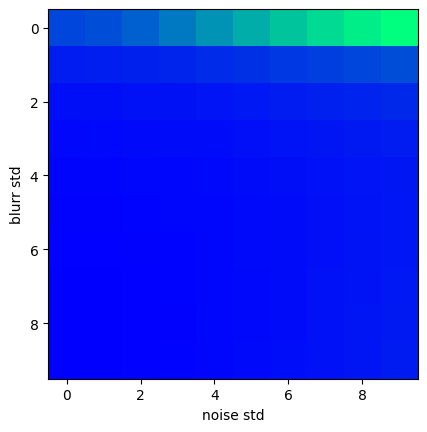

In [122]:
plt.imshow(np.asarray(means).reshape((10,10)), cmap='winter')
plt.xlabel('noise std')
plt.ylabel('blurr std')